In [1]:
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

# Building a class Signal for better use.
class Signal:

  def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):

    self.amplitude = amplitude
    self.frequency = frequency
    self.duration = duration
    self.sampling_rate = sampling_rate
    self.phase = phase
    self.time_step = 1.0/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)

  # Generate sine wave
  def sine(self):

    return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)

  # Generate cosine wave
  def cosine(self):

    return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

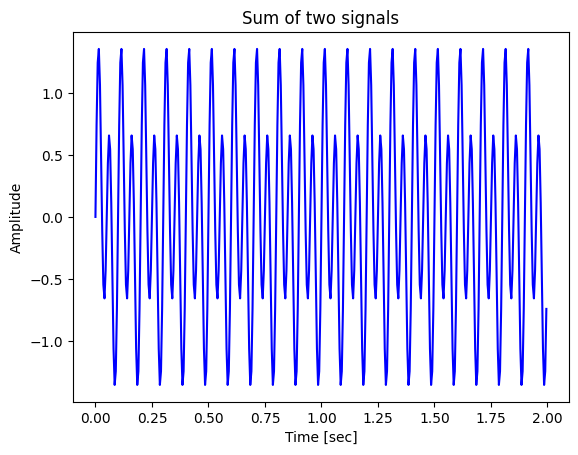

In [ ]:
# Generate the three signals using Signal class and its method sine()
#signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
#sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal =sine_20hz + sine_10hz

# Plot the signal
plt.plot(signal_20hz.time_axis, signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of two signals')
plt.show()

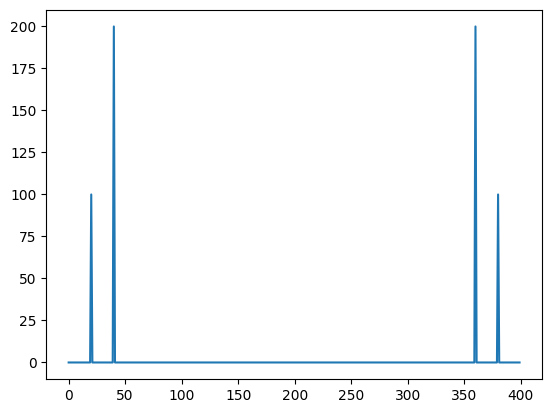

In [ ]:
# Apply the FFT on the signal
fourier = fft(signal)

# Plot the result (the spectrum |Xk|)
plt.plot(np.abs(fourier))
plt.show()

**Rectangular Pluse**

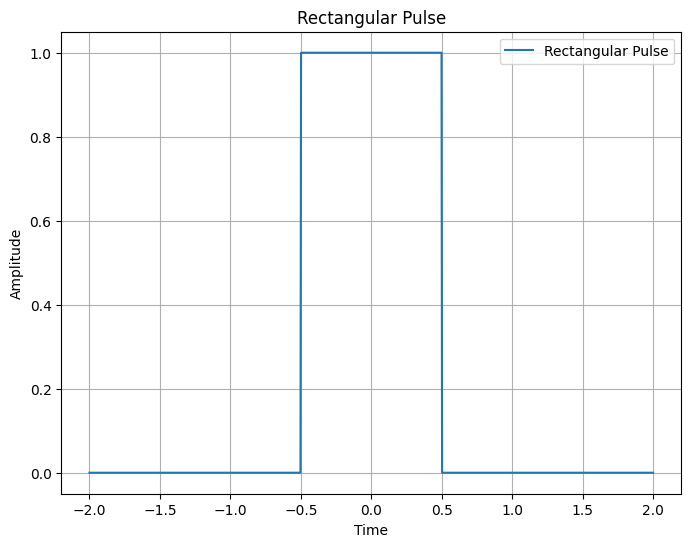

In [4]:
def rectangular_pulse(t, T, A):
    pulse = np.zeros_like(t)
    pulse[np.abs(t) <= T/2] = A
    return pulse

# Define parameters
T = 1.0  # Pulse width (in seconds)
A = 1.0  # Pulse amplitude

# Generate time values
t = np.linspace(-2, 2, 1000)

# Generate rectangular pulse
pulse = rectangular_pulse(t, T, A)

# Plot the pulse
plt.figure(figsize=(8, 6))
plt.plot(t, pulse, label='Rectangular Pulse')
plt.title('Rectangular Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

**Generates a rectangular pulse using Fourier series representation.**

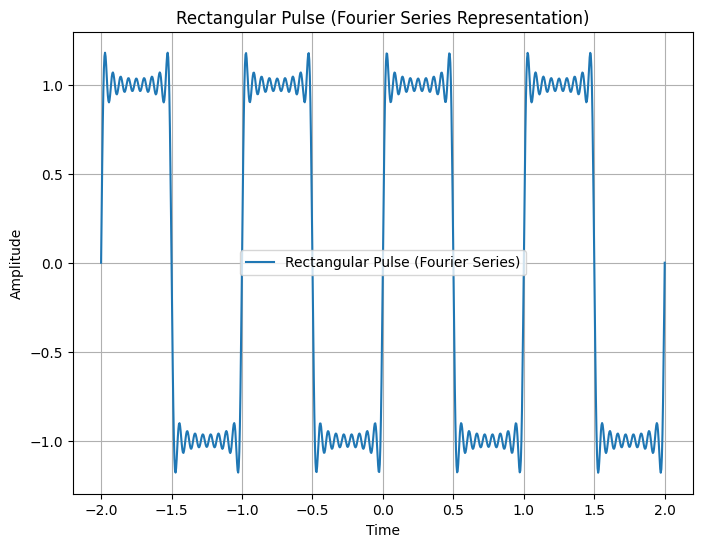

In [5]:
def rectangular_pulse(t, T):
    pulse = np.zeros_like(t)
    for n in range(1, 10):  # Number of terms in the Fourier series
        pulse += (4 / (np.pi * (2 * n - 1))) * np.sin((2 * np.pi * (2 * n - 1) * t) / T)
    return pulse

# Define parameters
T = 1.0  # Pulse width (in seconds)

# Generate time values
t = np.linspace(-2, 2, 1000)

# Generate rectangular pulse using Fourier series representation
pulse = rectangular_pulse(t, T)

# Plot the pulse
plt.figure(figsize=(8, 6))
plt.plot(t, pulse, label='Rectangular Pulse (Fourier Series)')
plt.title('Rectangular Pulse (Fourier Series Representation)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

**Exponential Pulse**

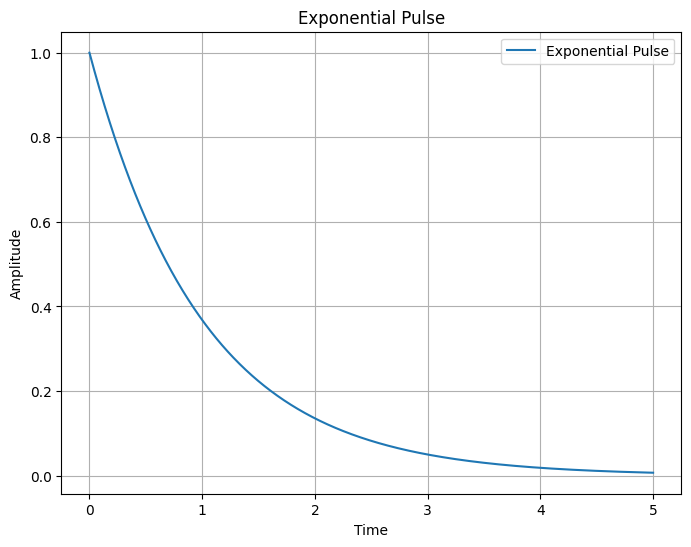

In [6]:
def exponential_pulse(t, tau, A):
    pulse = A * np.exp(-t / tau)
    return pulse

# Define parameters
tau = 1.0  # Time constant of the exponential decay
A = 1.0    # Pulse amplitude

# Generate time values
t = np.linspace(0, 5, 1000)

# Generate exponential pulse
pulse = exponential_pulse(t, tau, A)

# Plot the pulse
plt.figure(figsize=(8, 6))
plt.plot(t, pulse, label='Exponential Pulse')
plt.title('Exponential Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

**Combinations of Exponential Pulses**

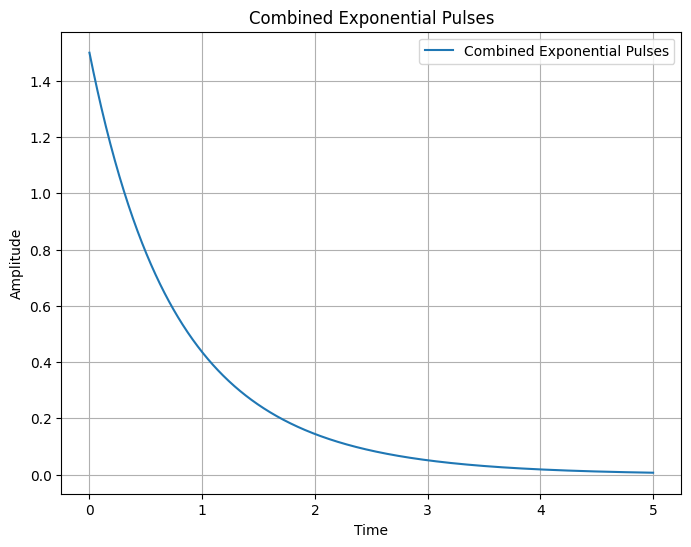

In [8]:
def exponential_pulse(t, tau, A):
    pulse = A * np.exp(-t / tau)
    return pulse

# Define parameters for the first exponential pulse
tau1 = 1.0  # Time constant of the first exponential pulse
A1 = 1.0    # Amplitude of the first exponential pulse

# Define parameters for the second exponential pulse
tau2 = 0.5  # Time constant of the second exponential pulse
A2 = 0.5    # Amplitude of the second exponential pulse

# Generate time values
t = np.linspace(0, 5, 1000)

# Generate exponential pulses
pulse1 = exponential_pulse(t, tau1, A1)
pulse2 = exponential_pulse(t, tau2, A2)

# Combine the exponential pulses
combined_pulse = pulse1 + pulse2

# Plot the combined pulse
plt.figure(figsize=(8, 6))
plt.plot(t, combined_pulse, label='Combined Exponential Pulses')
plt.title('Combined Exponential Pulses')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

**Radio Frequency Pluse**

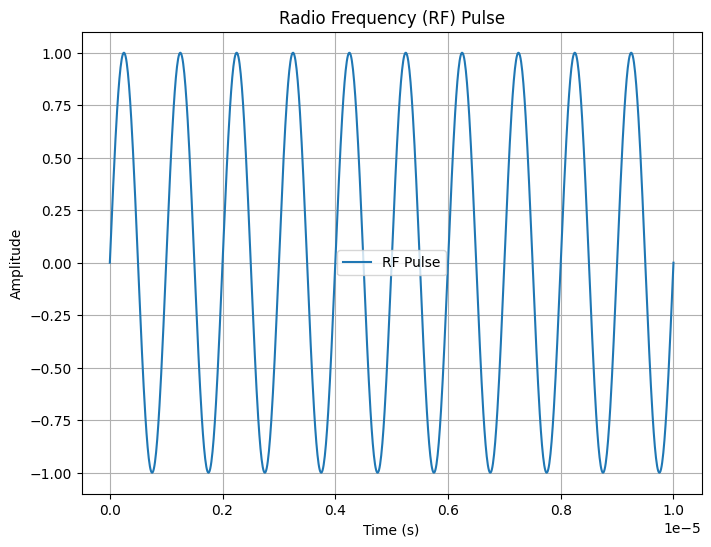

In [9]:
def rf_pulse(t, f, A):
    pulse = A * np.sin(2 * np.pi * f * t)
    return pulse

# Define parameters for the RF pulse
f = 1e6  # Frequency of the RF pulse (1 MHz)
A = 1.0  # Amplitude of the RF pulse

# Generate time values (assuming a duration of 10 microseconds)
t = np.linspace(0, 10e-6, 1000)

# Generate the RF pulse
rf_signal = rf_pulse(t, f, A)

# Plot the RF pulse
plt.figure(figsize=(8, 6))
plt.plot(t, rf_signal, label='RF Pulse')
plt.title('Radio Frequency (RF) Pulse')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

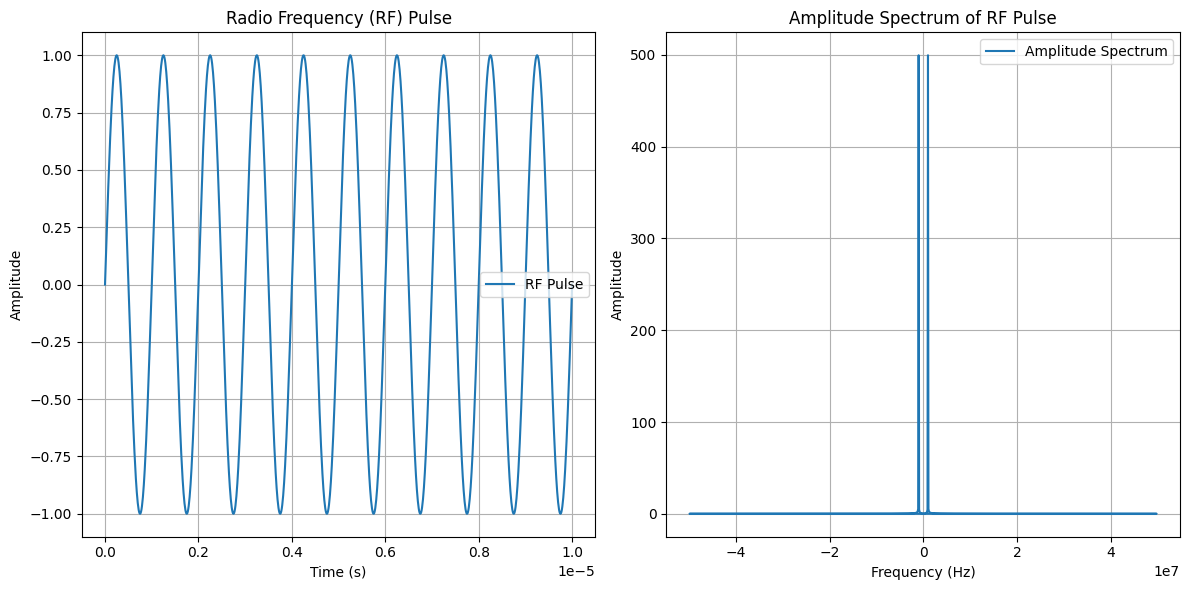

In [10]:
def rf_pulse(t, f, A):
    pulse = A * np.sin(2 * np.pi * f * t)
    return pulse

# Define parameters for the RF pulse
f = 1e6  # Frequency of the RF pulse (1 MHz)
A = 1.0  # Amplitude of the RF pulse

# Generate time values (assuming a duration of 10 microseconds)
t = np.linspace(0, 10e-6, 1000)

# Generate the RF pulse
rf_signal = rf_pulse(t, f, A)

# Compute the amplitude spectrum using Fourier Transform
amplitude_spectrum = np.abs(np.fft.fft(rf_signal))

# Frequency axis for the amplitude spectrum
frequency_axis = np.fft.fftfreq(len(t), t[1] - t[0])

# Plot the RF pulse
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, rf_signal, label='RF Pulse')
plt.title('Radio Frequency (RF) Pulse')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot the amplitude spectrum
plt.subplot(1, 2, 2)
plt.plot(frequency_axis, amplitude_spectrum, label='Amplitude Spectrum')
plt.title('Amplitude Spectrum of RF Pulse')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Gaussian Pulse**

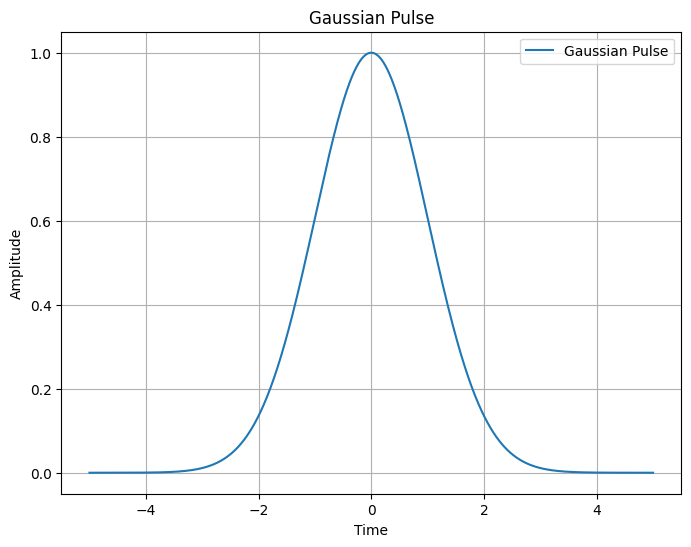

In [11]:
def gaussian_pulse(t, sigma, A):
    pulse = A * np.exp(-0.5 * (t / sigma)**2)
    return pulse

# Define parameters for the Gaussian pulse
sigma = 1.0  # Standard deviation of the Gaussian pulse
A = 1.0      # Amplitude of the Gaussian pulse

# Generate time values
t = np.linspace(-5, 5, 1000)

# Generate the Gaussian pulse
gaussian_signal = gaussian_pulse(t, sigma, A)

# Plot the Gaussian pulse
plt.figure(figsize=(8, 6))
plt.plot(t, gaussian_signal, label='Gaussian Pulse')
plt.title('Gaussian Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

Triangular Pulse

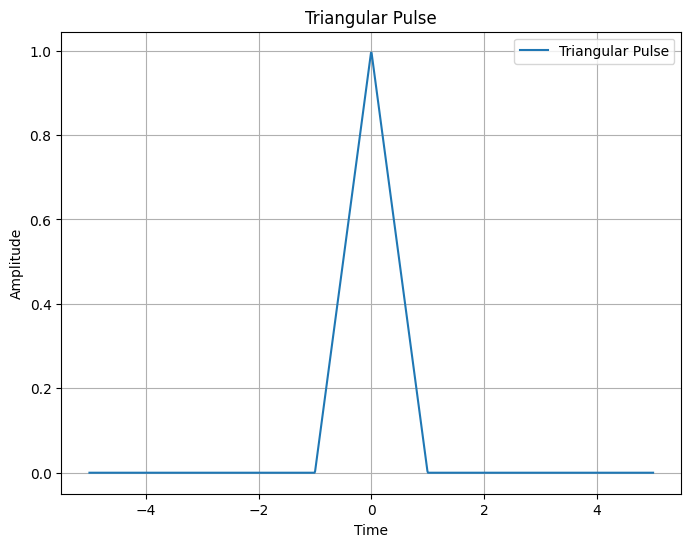

In [12]:
def triangular_pulse(t, T, A):
    pulse = np.zeros_like(t)
    half_T = T / 2
    pulse[np.abs(t) <= half_T] = A * (1 - np.abs(t[np.abs(t) <= half_T]) / half_T)
    return pulse

# Define parameters for the triangular pulse
T = 2.0  # Width of the triangular pulse (duration from peak to zero)
A = 1.0  # Amplitude of the triangular pulse

# Generate time values
t = np.linspace(-5, 5, 1000)

# Generate the triangular pulse
triangular_signal = triangular_pulse(t, T, A)

# Plot the triangular pulse
plt.figure(figsize=(8, 6))
plt.plot(t, triangular_signal, label='Triangular Pulse')
plt.title('Triangular Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

**Real and Imaginary Parts of a Time Function**

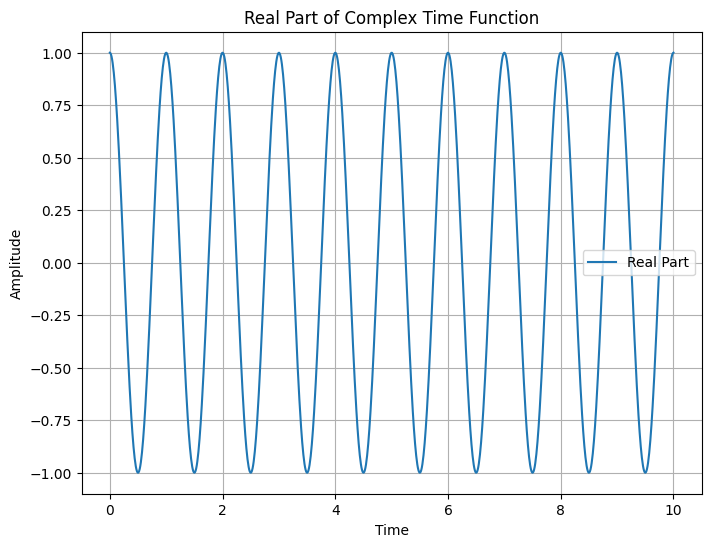

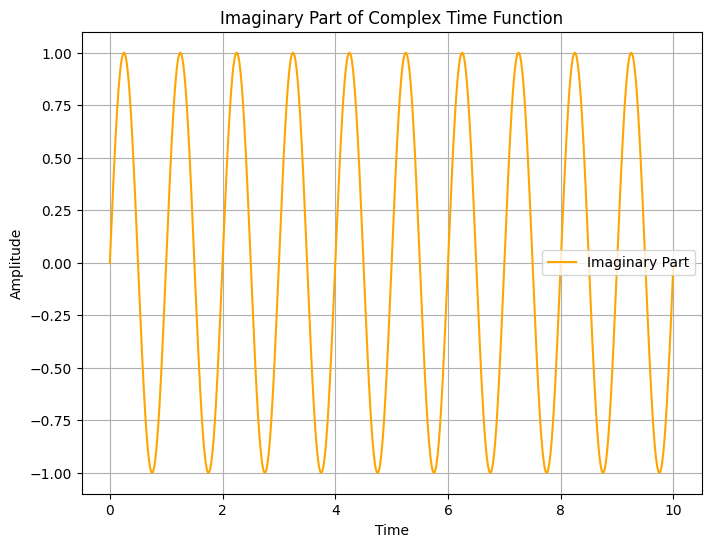

In [13]:
# Define the time values
t = np.linspace(0, 10, 1000)

# Define the complex time function (example: sinusoidal function)
# Here, we create a complex sinusoidal function as an example
# You can replace this function with any complex-valued function you want to analyze
complex_function = np.exp(1j * 2 * np.pi * t)

# Extract the real and imaginary parts of the complex function
real_part = np.real(complex_function)
imaginary_part = np.imag(complex_function)

# Plot the real part
plt.figure(figsize=(8, 6))
plt.plot(t, real_part, label='Real Part')
plt.title('Real Part of Complex Time Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Plot the imaginary part
plt.figure(figsize=(8, 6))
plt.plot(t, imaginary_part, label='Imaginary Part', color='orange')
plt.title('Imaginary Part of Complex Time Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

**Convolution in the Time Domain**

<ipython-input-14-1a311aec465b>:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, use_line_collection=True)
<ipython-input-14-1a311aec465b>:24: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h, use_line_collection=True)
<ipython-input-14-1a311aec465b>:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y, use_line_collection=True)


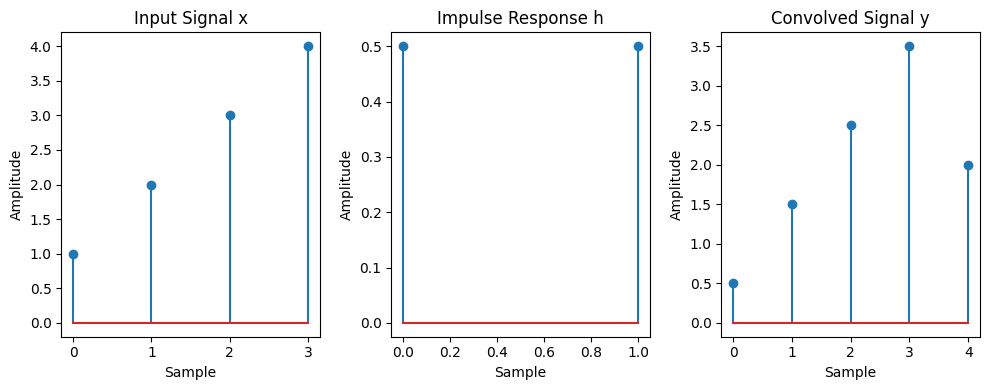

In [14]:
def convolution(x, h):
    convolved_signal = np.convolve(x, h, mode='full')
    return convolved_signal

# Define input signal x
x = np.array([1, 2, 3, 4])

# Define impulse response h
h = np.array([0.5, 0.5])

# Perform convolution
y = convolution(x, h)

# Plot input signal x
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.stem(x, use_line_collection=True)
plt.title('Input Signal x')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot impulse response h
plt.subplot(1, 3, 2)
plt.stem(h, use_line_collection=True)
plt.title('Impulse Response h')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot convolved signal y
plt.subplot(1, 3, 3)
plt.stem(y, use_line_collection=True)
plt.title('Convolved Signal y')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

**Conjugate Function**

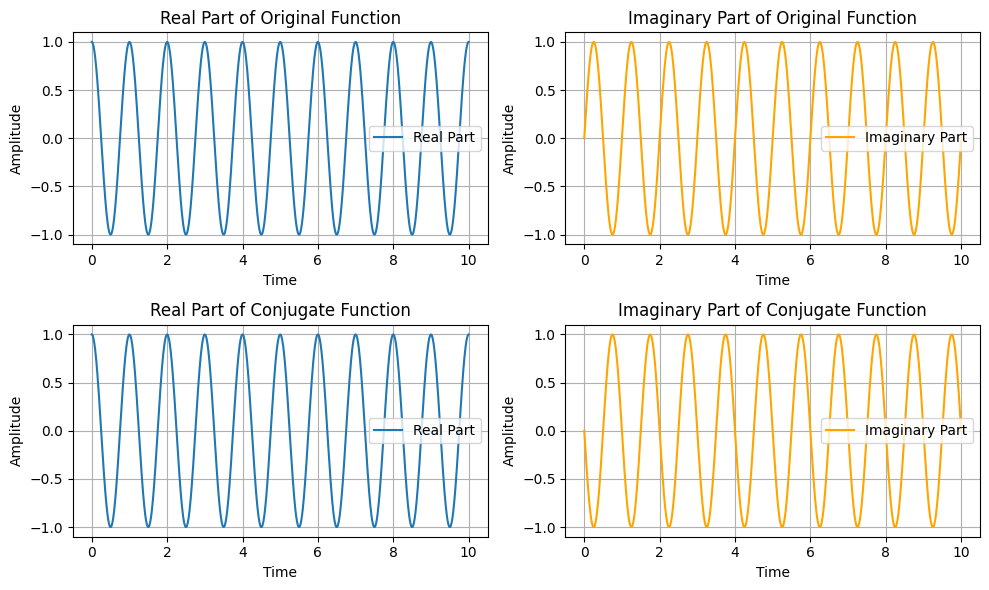

In [15]:
# Define the complex-valued function (example: sinusoidal function)
t = np.linspace(0, 10, 1000)
complex_function = np.exp(1j * 2 * np.pi * t)

# Compute the complex conjugate
conjugate_function = np.conj(complex_function)

# Plot the real and imaginary parts of the original and conjugate functions
plt.figure(figsize=(10, 6))

# Plot the real part of the original function
plt.subplot(2, 2, 1)
plt.plot(t, np.real(complex_function), label='Real Part')
plt.title('Real Part of Original Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot the imaginary part of the original function
plt.subplot(2, 2, 2)
plt.plot(t, np.imag(complex_function), label='Imaginary Part', color='orange')
plt.title('Imaginary Part of Original Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot the real part of the conjugate function
plt.subplot(2, 2, 3)
plt.plot(t, np.real(conjugate_function), label='Real Part')
plt.title('Real Part of Conjugate Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot the imaginary part of the conjugate function
plt.subplot(2, 2, 4)
plt.plot(t, np.imag(conjugate_function), label='Imaginary Part', color='orange')
plt.title('Imaginary Part of Conjugate Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Time scaling on a signal**

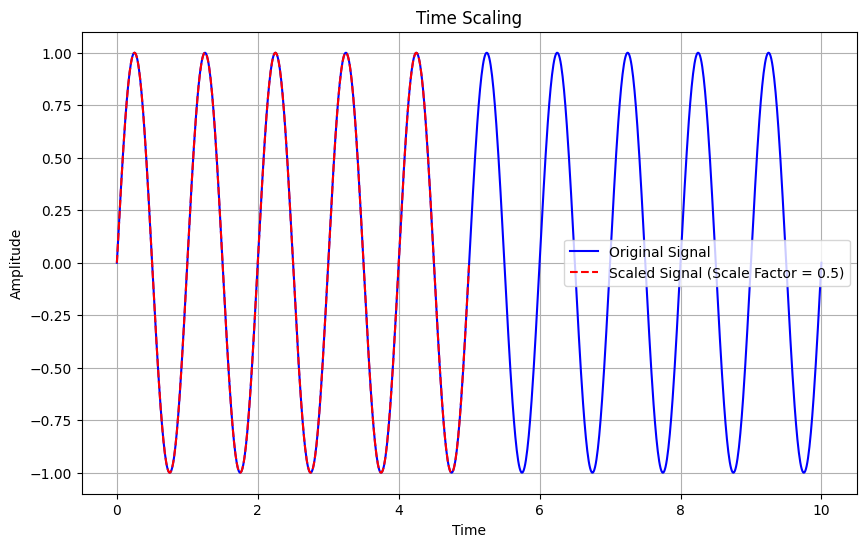

In [16]:
def time_scaling(signal, scale_factor):
    scaled_signal = signal.copy()
    t_scaled = np.arange(len(signal)) * scale_factor
    return np.interp(t_scaled, np.arange(len(signal)), signal)

# Define the original signal
t = np.linspace(0, 10, 1000)
original_signal = np.sin(2 * np.pi * t)

# Define the scale factor
scale_factor = 0.5  # Scaling down the time axis by a factor of 0.5

# Perform time scaling
scaled_signal = time_scaling(original_signal, scale_factor)

# Plot the original and scaled signals
plt.figure(figsize=(10, 6))

plt.plot(t, original_signal, label='Original Signal', color='blue')
plt.plot(t * scale_factor, scaled_signal, label=f'Scaled Signal (Scale Factor = {scale_factor})', linestyle='--', color='red')

plt.title('Time Scaling')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

**Area Under G(F)**

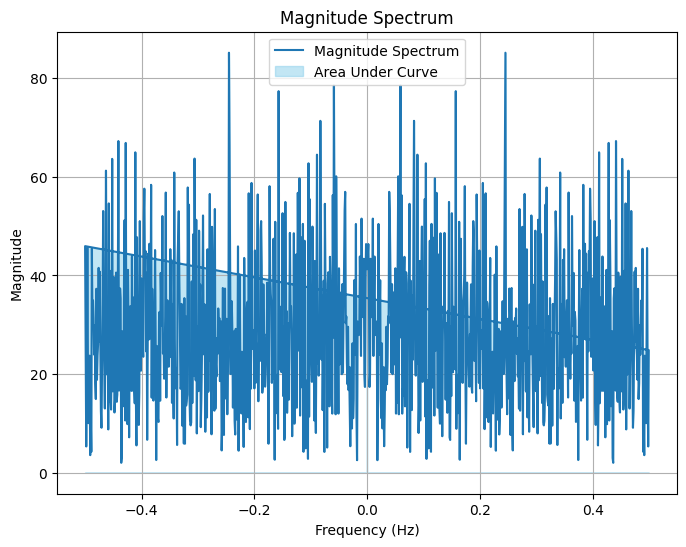

Area under the curve in the frequency domain: 28491.20277911631


In [17]:

def area_under_frequency_domain(freq, magnitude):
    return np.sum(magnitude)

# Generate example data in frequency domain
N = 1000  # Number of frequency bins
freq = np.fft.fftfreq(N, d=1)  # Frequency values
magnitude = np.abs(np.fft.fft(np.random.normal(size=N)))  # Example magnitudes (you can replace it with your own)

# Calculate the area under the curve in the frequency domain
area_freq_domain = area_under_frequency_domain(freq, magnitude)

# Plot the magnitude spectrum
plt.figure(figsize=(8, 6))
plt.plot(freq, magnitude, label='Magnitude Spectrum')
plt.fill_between(freq, magnitude, color='skyblue', alpha=0.5, label='Area Under Curve')

plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

# Print the calculated area under the curve in the frequency domain
print(f"Area under the curve in the frequency domain: {area_freq_domain}")

**Duality**:
Duality in communication systems often involves operations such as convolution and multiplication, or modulation and demodulation, where operations in the time domain have corresponding operations in the frequency domain, and vice versa.

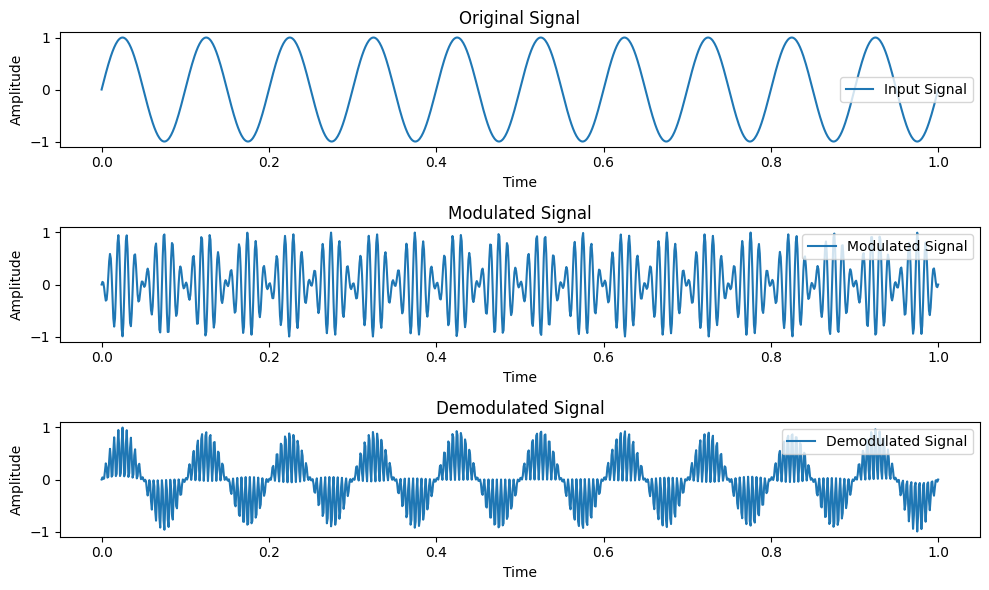

In [18]:
# Define modulation function (time domain operation)
def modulation(signal, carrier_frequency, modulation_index, time):
    return signal * np.cos(2 * np.pi * carrier_frequency * time + modulation_index * np.sin(2 * np.pi * time))

# Define demodulation function (frequency domain operation)
def demodulation(modulated_signal, carrier_frequency, time):
    return modulated_signal * np.cos(2 * np.pi * carrier_frequency * time)

# Define input signal
time = np.linspace(0, 1, 1000)
input_signal = np.sin(2 * np.pi * 10 * time)  # Example input sinusoidal signal

# Modulation parameters
carrier_frequency = 100
modulation_index = 0.5

# Modulate the input signal
modulated_signal = modulation(input_signal, carrier_frequency, modulation_index, time)

# Demodulate the modulated signal
demodulated_signal = demodulation(modulated_signal, carrier_frequency, time)

# Plot the original signal, modulated signal, and demodulated signal
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(time, input_signal, label='Input Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, modulated_signal, label='Modulated Signal')
plt.title('Modulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, demodulated_signal, label='Demodulated Signal')
plt.title('Demodulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

**The Delta Function as a Limiting Form of the Gaussian Pulse**

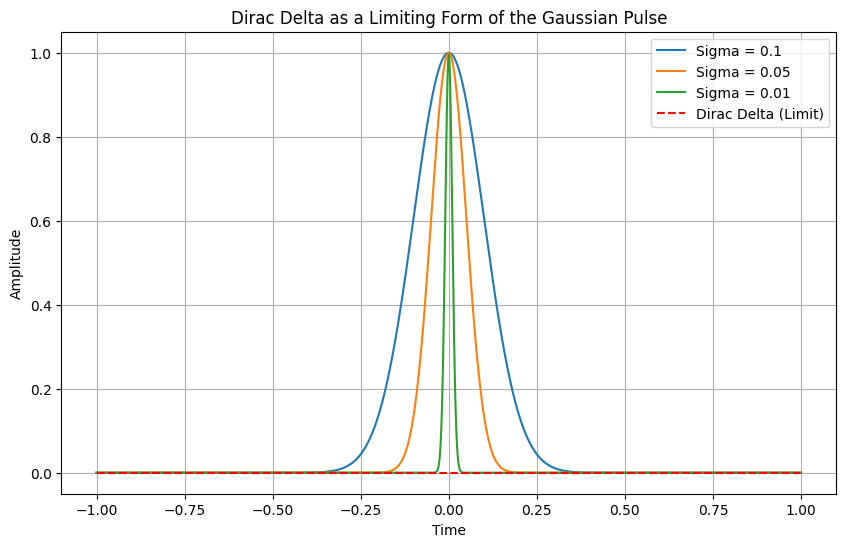

In [19]:
def gaussian_pulse(t, sigma, A):
    pulse = A * np.exp(-0.5 * (t / sigma)**2)
    return pulse

# Define parameters for the Gaussian pulse
sigma_values = [0.1, 0.05, 0.01]  # Different standard deviation values
A = 1.0  # Amplitude of the Gaussian pulse

# Generate time values
t = np.linspace(-1, 1, 1000)

# Generate Gaussian pulses with different standard deviation values
gaussian_pulses = [gaussian_pulse(t, sigma, A) for sigma in sigma_values]

# Plot the Gaussian pulses
plt.figure(figsize=(10, 6))
for i, sigma in enumerate(sigma_values):
    plt.plot(t, gaussian_pulses[i], label=f'Sigma = {sigma}')

# Plot Dirac delta function as the limit of Gaussian pulse
plt.plot(t, np.zeros_like(t), 'r--', label='Dirac Delta (Limit)')
plt.title('Dirac Delta as a Limiting Form of the Gaussian Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

**Pulse Response of Ideal Low-Pass Filter**

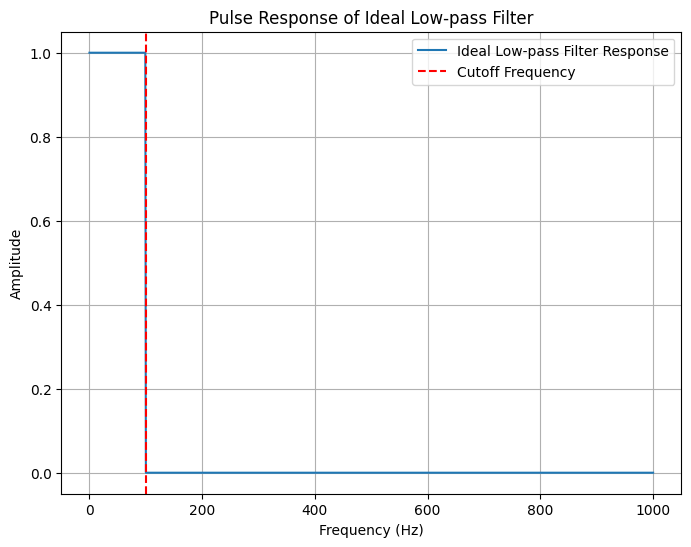

In [20]:
def ideal_lowpass_filter_response(frequency, cutoff_frequency):
    return np.where(frequency <= cutoff_frequency, 1, 0)

# Define parameters
sampling_frequency = 1000  # Sampling frequency in Hz
cutoff_frequency = 100     # Cutoff frequency of the low-pass filter in Hz

# Generate frequency values
frequencies = np.linspace(0, sampling_frequency, 1000)

# Compute the pulse response of the ideal low-pass filter
pulse_response = ideal_lowpass_filter_response(frequencies, cutoff_frequency)

# Plot the pulse response
plt.figure(figsize=(8, 6))
plt.plot(frequencies, pulse_response, label='Ideal Low-pass Filter Response')
plt.axvline(x=cutoff_frequency, color='r', linestyle='--', label='Cutoff Frequency')
plt.title('Pulse Response of Ideal Low-pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

**Ideal Sampling Function**

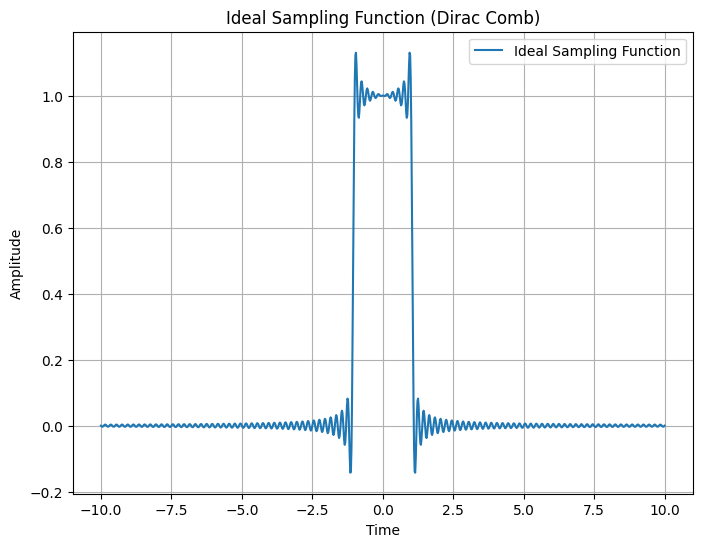

In [21]:
def ideal_sampling_function(t, T):
    return np.sum([np.sinc((t - n * T) / T) for n in range(-10, 11)], axis=0)

# Define parameters
sampling_period = 0.1  # Sampling period
t = np.linspace(-10, 10, 1000)  # Time values

# Compute the ideal sampling function
sampling_function = ideal_sampling_function(t, sampling_period)

# Plot the ideal sampling function
plt.figure(figsize=(8, 6))
plt.plot(t, sampling_function, label='Ideal Sampling Function')
plt.title('Ideal Sampling Function (Dirac Comb)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()